In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv("../data/processed/train_FD001_processed.csv")
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
op_cols = ['op_setting_1','op_setting_2','op_setting_3']
op_stats = df[op_cols].describe().T
op_stats['unique_values'] = [df[c].nunique() for c in op_cols]
op_stats['variance'] = [df[c].var() for c in op_cols]
op_stats


,count,mean,std,min,25%,50%,75%,max,unique_values,variance
op_setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0,0.0015,0.0087,158,4.784340e-06
op_setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0,0.0003,0.0006,13,8.588541e-08
op_setting_3,20631.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000,1,0.000000e+00


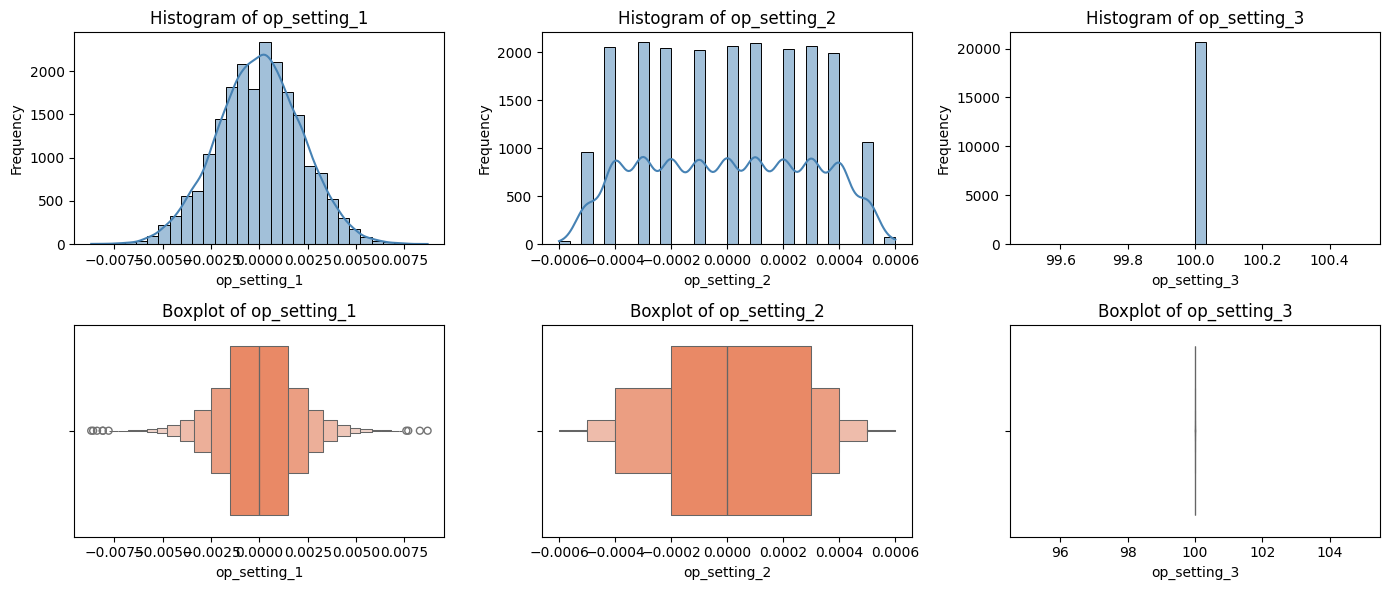

In [7]:
plt.figure(figsize=(14,6))
for i, col in enumerate(op_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True, bins = 30, color = "steelblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(2,3,i+3)
    sns.boxenplot(x=df[col],color = 'coral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()